In [1]:
import time
start_time=time.time()

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pathlib import Path

from astropy.io import fits
import astropy.units as u
from astropy.table import Table
import json
#plt.rcParams["font.family"]="Times New Roman"
#plt.rcParams["font.size"]="17"

Input path

observations folder location

In [3]:
text_file_0 = open("path-observations.txt", "r")
path_obs = text_file_0.read()

In [4]:
datapath_obs = Path(path_obs).expanduser()

results folder location

In [5]:
text_file_1 = open("path-results.txt", "r")
path_res = text_file_1.read()

In [6]:
datapath_res= Path(path_res).expanduser()

files names

In [7]:
data_file = 'FLA-Car'

In [8]:
name_export='FLA-Car-S'

In [9]:
dist = 2130 #parsecs
pc = dist*(2*np.pi) / (360 * 60 * 60)
s0=(0.9*pc)
pc,s0

(0.010326531407633116, 0.009293878266869804)

In [10]:
damiani_tab1_file = str(datapath_obs) +'/' + data_file + ".fits"
tab = Table.read(damiani_tab1_file)
tab

Id,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,[NII]sigmab,[NII]Nr,[NII]RVr,[NII]sigmar,HeINb,HeIRVb,HeIsigmab,HeINr,HeIRVr,HeIsigmar,[SII]1Nb,[SII]1RVb,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar,Setup
,deg,deg,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,km / (min s),km / s,km / s,
bytes29,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bytes10
SKY__10434580-5930497,160.9408,-59.51381,43435.14,-23.61,15.61,58918.77,4.94,13.38,2943.68,-31.66,14.71,11672.97,2.10,10.67,15235.06,-22.16,13.79,18024.73,5.19,10.38,998.76,-32.45,12.98,3398.53,4.20,10.39,727.14,-33.94,12.95,2696.04,3.09,10.02,sky_HR15N
SKY__10445840-5933062,161.2433,-59.55172,18256.59,-31.12,13.93,34321.84,5.23,15.21,1130.41,-24.70,15.34,4429.57,5.90,15.36,5555.79,-30.83,11.55,11833.37,5.01,13.96,1655.72,-4.40,19.00,736.73,9.41,9.97,1304.64,-4.45,19.94,519.97,8.08,9.21,sky_HR15N
SKY__10445040-5935467,161.2100,-59.59631,34377.49,-28.47,13.77,65136.86,-0.09,17.20,2528.38,-22.84,13.49,3541.20,9.64,14.93,11447.99,-28.24,10.67,22875.81,0.41,14.87,1733.36,-20.27,18.14,950.03,14.14,12.06,1352.34,-19.90,18.25,642.85,13.89,11.27,sky_HR15N
SKY__10443390-5934549,161.1413,-59.58192,34307.92,-29.53,14.51,30563.08,-15.04,23.81,10198.94,-25.17,12.26,3538.75,-12.05,25.62,10756.85,-29.39,12.29,11023.40,-15.58,23.19,2687.79,-21.74,12.12,740.18,7.11,32.20,2636.84,-22.17,11.68,582.76,6.44,32.56,sky_HR15N
SKY__10451730-5942205,161.3221,-59.70569,37527.72,-28.25,15.50,22025.68,14.37,14.07,6328.36,-28.63,13.16,2644.65,15.04,12.74,9441.61,-27.95,11.69,7676.87,13.18,13.84,1748.67,-25.49,12.72,836.83,16.73,11.97,1313.25,-26.18,12.99,610.61,16.64,11.96,sky_HR15N
SKY__10451970-5945404,161.3321,-59.76122,24245.06,-21.95,15.87,9017.24,11.42,15.95,4011.71,-17.86,13.23,2122.03,-7.92,27.32,7065.39,-17.61,13.23,1828.86,14.34,8.58,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N
SKY__10444430-5943333,161.1846,-59.72592,30519.80,-34.15,14.82,53892.78,7.00,14.64,7207.63,-33.96,12.22,5305.92,9.02,13.03,9951.92,-32.18,14.02,17619.99,7.92,12.14,2213.11,-31.97,11.54,1278.25,10.42,13.44,1662.81,-32.62,11.37,933.80,9.52,13.01,sky_HR15N
SKY__10440670-5947505,161.0279,-59.79736,8057.94,-24.88,16.14,10603.72,10.00,15.99,1587.50,-20.77,13.62,937.43,11.35,15.09,1064.69,-31.31,8.00,4338.92,5.87,17.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,sky_HR15N


In [11]:
df = tab.to_pandas()
df.describe()

,RAdeg,DEdeg,HaNb,HaRVb,Hasigmab,HaNr,HaRVr,Hasigmar,[NII]Nb,[NII]RVb,...,[SII]1sigmab,[SII]1Nr,[SII]1RVr,[SII]1sigmar,[SII]2Nb,[SII]2RVb,[SII]2sigmab,[SII]2Nr,[SII]2RVr,[SII]2sigmar
count,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,...,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000,866.000000
mean,161.161726,-59.654315,62767.252113,-24.714007,15.885924,53873.122564,7.306363,16.018268,1631.775751,-8.739353,...,9.829619,1484.462829,9.367286,8.744284,1270.717298,-16.464157,9.631455,1203.455046,8.396328,8.680335
std,0.133125,0.080215,54846.830866,8.147913,2.757231,39423.863415,7.179267,5.690883,3522.508469,12.911389,...,6.643375,1633.447299,7.761613,6.028452,1931.147707,12.642477,6.675027,1461.860496,8.268913,6.144453
min,160.768700,-59.891890,0.000000,-51.840000,0.000000,0.000000,-25.070000,0.000000,0.000000,-44.180000,...,0.000000,0.000000,-16.630000,0.000000,0.000000,-39.300000,0.000000,0.000000,-47.760000,0.000000
25%,161.065825,-59.711945,28485.557500,-31.042500,14.320000,24528.595000,3.960000,13.850000,0.000000,-21.497500,...,0.000000,0.000000,0.000000,0.000000,0.000000,-27.327500,0.000000,0.000000,0.000000,0.000000
50%,161.155600,-59.657835,46452.860000,-26.800000,15.170000,45810.270000,7.635000,14.705000,0.000000,0.000000,...,12.010000,1135.875000,10.990000,11.110000,992.800000,-20.370000,11.700000,865.820000,9.485000,10.915000
75%,161.267100,-59.590390,76666.205000,-19.765000,16.707500,76315.320000,12.702500,16.310000,2243.900000,0.000000,...,13.950000,2091.252500,15.367500,12.155000,1706.045000,0.000000,13.857500,1642.482500,14.367500,12.087500
max,161.472400,-59.494310,483044.020000,0.000000,29.720000,372640.170000,32.650000,84.800000,44719.640000,7.920000,...,32.200000,12610.120000,54.680000,44.470000,29844.350000,2.940000,32.070000,13224.150000,61.700000,43.280000


In [12]:
m= tab["[SII]2sigmab"] > 5

[Text(0.5, 0, 'Velocity')]

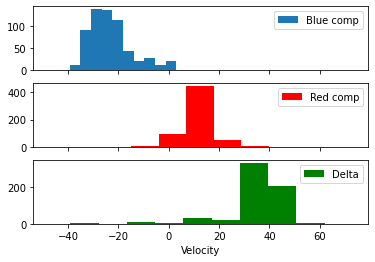

In [13]:
fig, [axb, axr, axd] = plt.subplots(3, 1, sharex=True)
axb.hist(tab["[SII]2RVb"][m], label='Blue comp')
axr.hist(tab["[SII]2RVr"][m], color='r', label='Red comp')
axd.hist(tab["[SII]2RVr"][m] - tab["[SII]2RVb"][m], color='g', label='Delta')
for ax in axb, axr, axd:
    ax.legend()
axd.set(xlabel='Velocity')

In [14]:
df = df.assign(Ha_dV=df["[SII]2RVr"] - df["[SII]2RVb"])
df = df.assign(Ha_close=(df['Ha_dV'] < 15.0).astype('S5') )
df = df.assign(Ha_rb_ratio=np.log10(df['[SII]2Nr']/df['[SII]2Nb']))

Blue component

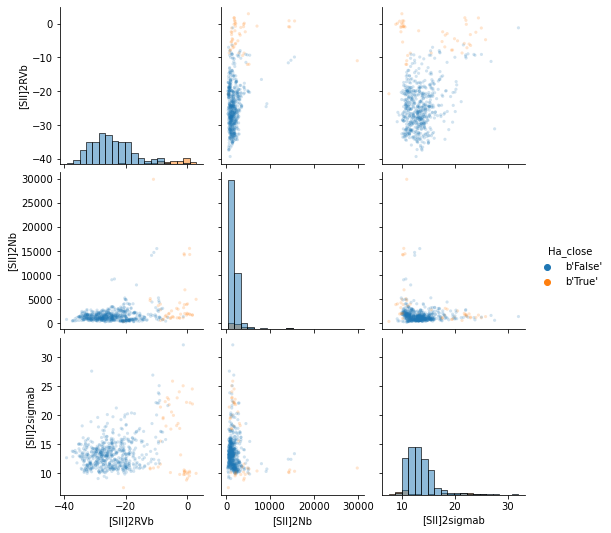

In [15]:
sns.pairplot(df[m], 
             vars=["[SII]2RVb", "[SII]2Nb", "[SII]2sigmab"], 
             diag_kind='hist', hue="Ha_close", 
             plot_kws=dict(alpha=0.2, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNb),df.HaRVb, alpha=0.1, color='k', label='CarB')

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')
plt.legend()

fig, ax = plt.subplots()
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.1, color='k', label='CarB')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaBlue.pdf', bbox_inches='tight')

Red Component

mask = df['Hasigmar'] > 35.0
df = df[~mask]


df.dropna(inplace=True)

sns.pairplot(df, 
             vars=["HaRVr", "HaNr", "Hasigmar"], 
             diag_kind='hist', hue="Ha_close",
             plot_kws=dict(alpha=0.3, s=10, edgecolor='none'),
             diag_kws=dict(bins=20),
            )

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_xlabel('Log I')
ax.set_ylabel('$σ_{LOS}$ [km/s]')

plt.legend()

fig, ax = plt.subplots()
plt.scatter(np.log10(df.HaNr),df.HaRVr, alpha=0.1, color='k', label='CarR')

plt.legend()

ax.set_xlabel('Log I')
ax.set_ylabel('centroid velocity [km/s]')

fig, ax = plt.subplots()
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.1, color='k', label='CarR')

ax.set_ylabel('$σ_{LOS}$ [km/s]')
ax.set_xlabel('centroid velocity [km/s]')
plt.legend()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaRed.pdf', bbox_inches='tight')

plt.figure(figsize=(20, 4))

plt.subplot(131)
plt.scatter(df.HaRVb,df.Hasigmab, alpha=0.075, color='k', label='blue')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.subplot(132)
plt.scatter(df.HaRVr,df.Hasigmar, alpha=0.075, color='k', label='red')
plt.xlabel('centroid velocity [km/s]')
plt.ylabel('$σ_{LOS}$ [km/s]')
plt.legend()

plt.show()

plt.rcParams["font.size"]="17"

#fig.savefig('CarinaLOSvsPOS.pdf', bbox_inches='tight')

Combining Components

In [16]:
def combine_moments(f1, v1, s1, f2, v2, s2, return_skew=False):
    """Find combined flux, mean velocity, and sigma for two components 
    with fluxes `f1` and `f2`, velocities `v1` and `v2`, and sigmas `s1` and `s2`. 
    Returns tuple of the combined moments: `f`, `v`, `s`."""
    f = f1 + f2
    v = (v1*f1 + v2*f2)/f
    ss = (s1*s1*f1 + s2*s2*f2)/f
    ss += f1*f2*(v1 - v2)**2 / f**2
    s = np.sqrt(ss)
    if return_skew:
        p1 = f1/f
        p2 = f2/f
        skew = p1*p2*(v1 - v2)*((1 - 2*p1)*(v1 - v2)**2 + 3*(s1**2 - s2**2))
        skew /= (p1*(p2*(v1 - v2)**2 + s1**2 - s2**2) + s2**2)**1.5
#        vmode = np.where(f1 > f2, v1, v2)
#        mskew = (v - vmode)/s
        return f, v, s, skew
    else:
        return f, v, s

In [17]:
fHa, vHa, sHa, gHa = combine_moments(
    df["[SII]2Nr"],df["[SII]2RVr"],df["[SII]2sigmar"],
    df["[SII]2Nb"],df["[SII]2RVb"],df["[SII]2sigmab"],
    return_skew=True
)

In [18]:
dfHa = pd.DataFrame(
    {'log_F': np.log10(fHa), 
     'V_mean': vHa, 
     'sigma': sHa, 
     'skew': gHa,
     'R_B': df.Ha_rb_ratio,
     'dV': df.Ha_dV,
     'close': df.Ha_close,
     'RAdeg': df.RAdeg,
     'DEdeg': df.DEdeg,
    }
).dropna()

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
dfHa.describe()

,log_F,V_mean,sigma,skew,R_B,dV,RAdeg,DEdeg
count,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000,615.000000
mean,3.474332,-6.069345,20.963452,-0.101522,-0.042816,35.006797,161.180315,-59.649326
std,0.220224,6.856434,3.080286,0.562582,0.454941,11.557042,0.127382,0.071403
min,2.745317,-20.446678,11.852930,-1.456398,-2.147177,-39.080000,160.892000,-59.811890
25%,3.333794,-11.354145,19.028805,-0.503602,-0.333895,33.880000,161.095000,-59.707180
50%,3.464874,-6.644946,21.085795,-0.174327,0.010638,37.590000,161.174200,-59.659030
75%,3.574143,-0.662169,23.172197,0.312472,0.284102,41.100000,161.284200,-59.591900
max,4.510369,10.076909,28.359471,1.594442,1.047097,73.140000,161.472400,-59.494310


Maps

In [20]:
points_of_interest = {
    "eta Car": [161.26517, -59.684425],
    "Tr 14": [160.98911, -59.547698],
    "WR 25": [161.0433, -59.719735],
    "Finger": [161.13133, -59.664035],
}
def mark_points(ax):
    for label, c in points_of_interest.items():
        ax.plot(c[0], c[1], marker='+', markersize='12', color='k')

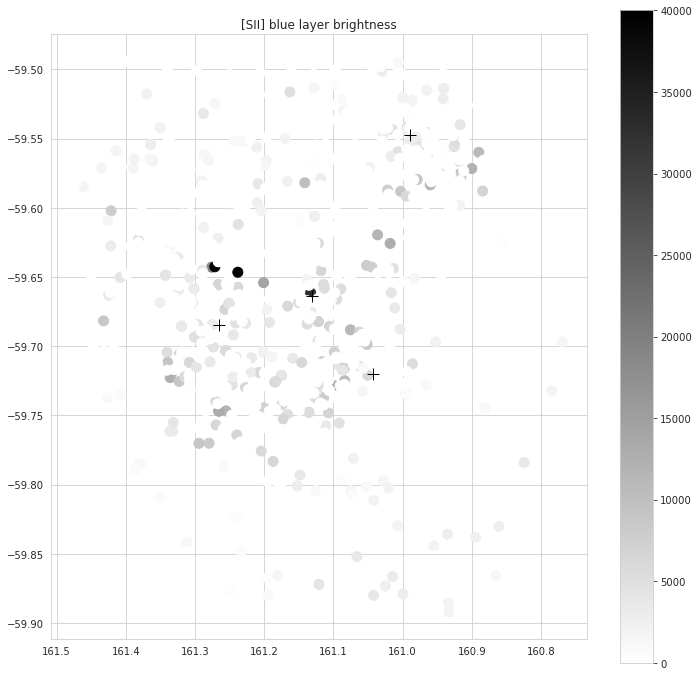

In [21]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df['[NII]Nb'], cmap='gray_r', vmin=0.0, vmax=4e4)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('[SII] blue layer brightness')

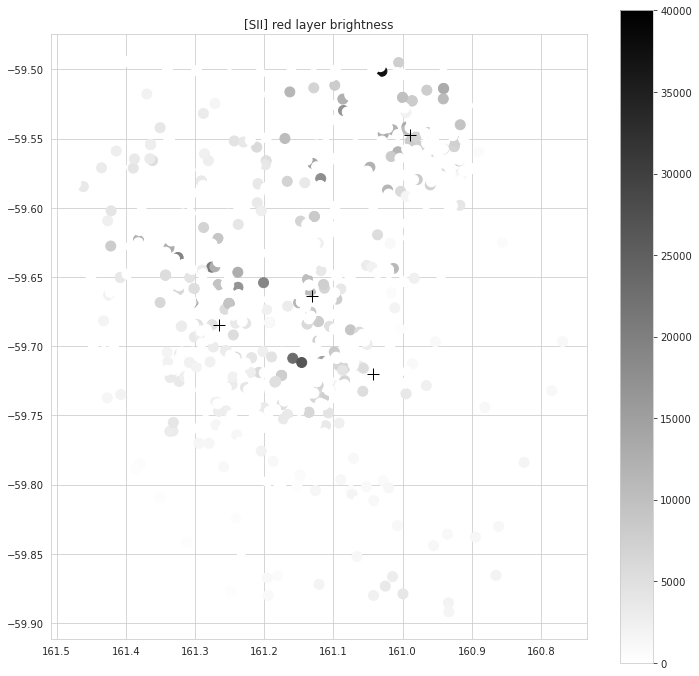

In [22]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(df.RAdeg, df.DEdeg, s=100, c=df['[NII]Nr'], cmap='gray_r', vmin=0.0, vmax=4e4)
    fig.colorbar(scat, ax=ax)
    mark_points(ax)
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title('[SII] red layer brightness')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


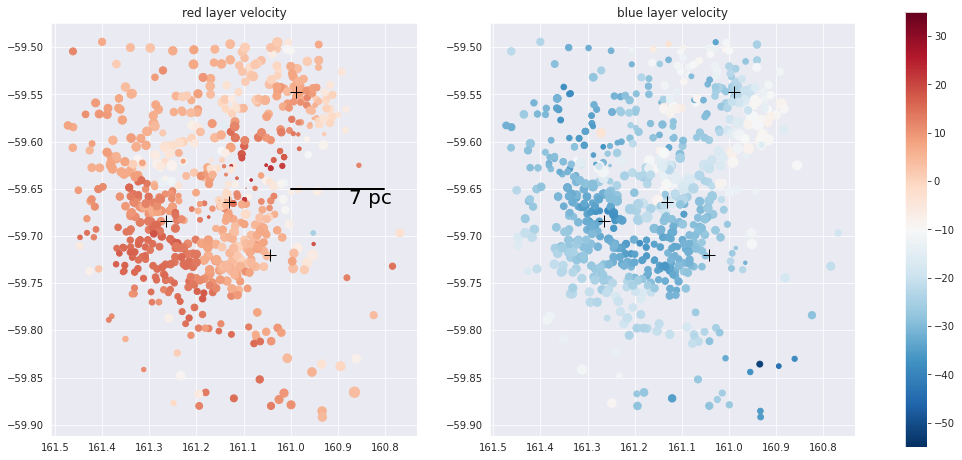

In [23]:
with sns.axes_style("darkgrid"):
    fig, [axr, axb] = plt.subplots(1, 2, figsize=(18, 8))
    scat = axr.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNr/df.HaNb) + 1.3), 
                      c=df.HaRVr, cmap='RdBu_r',
                      vmin=-55, vmax=35, 
                     )
    
    axr.text(0.53, 0.2, '7 pc',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='black', fontsize=20)
    
    axr.axhline(y=-59.65, xmin=0.655, xmax=0.91, linewidth=2, color = 'k')
    
    scat = axb.scatter(df.RAdeg, df.DEdeg, 
                      s=40*(np.log10(df.HaNb/df.HaNr) + 1.3), 
                      c=df.HaRVb, cmap='RdBu_r',
                      vmin=-55, vmax=35,
                     )
    
#    scat2 = ax.scatter(df.RAdeg, df.DEdeg, 
#                      s=50*(np.log10(df.HaNr) - 3), 
#                      c=df.HaRVr, cmap='RdBu_r',
#                      vmin=-55, vmax=35, marker='+',
#                     )
    fig.colorbar(scat, ax=[axr, axb])
    mark_points(axr)
    mark_points(axb)
    axr.invert_xaxis()
    axr.set_aspect(2.0)
    axb.invert_xaxis()
    axb.set_aspect(2.0)  
    axr.set_title('red layer velocity')
    axb.set_title('blue layer velocity')

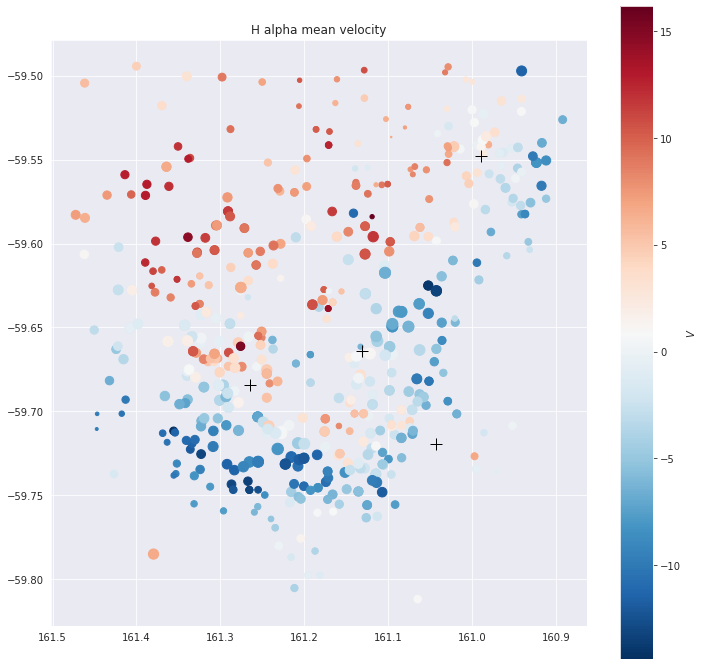

In [24]:
with sns.axes_style("darkgrid"):
    fig, ax = plt.subplots(figsize=(12, 12))
    scat = ax.scatter(dfHa.RAdeg, dfHa.DEdeg, s=8*(dfHa.sigma - 12), c=dfHa.V_mean-dfHa.V_mean.mean(), cmap='RdBu_r')
    mark_points(ax)
    fig.colorbar(scat, ax=ax).set_label("$V$")
    ax.invert_xaxis()
    ax.set_aspect(2)
    ax.set_title("[SII] mean velocity")
    
    #ax.text(0.32, 0.2, '7 pc',
    #    verticalalignment='bottom', horizontalalignment='right',
    #    transform=ax.transAxes,
    #    color='black', fontsize=20)
    #ax.axhline(y=-59.83, xmin=0.14, xmax=0.395, linewidth=2, color = 'k')

Structure Fucntion

Dr. Will Blue

df2 = df[['RAdeg', 'DEdeg', 'HaRVb']].copy()
df2.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVb' : 'RV'}, inplace = True)
#df2.describe()

Red Dr. Will

df3 = df[['RAdeg', 'DEdeg', 'HaRVr']].copy()
df3.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'HaRVr' : 'RV'}, inplace = True)
#df3.describe()

Combined

In [25]:
dfHa

,log_F,V_mean,sigma,skew,R_B,dV,close,RAdeg,DEdeg
0,3.534430,-4.775784,18.549822,-0.961418,0.569108,37.03,b'False',160.9408,-59.51381
1,3.261170,-0.879251,18.451563,-0.353923,-0.399512,12.53,b'True',161.2433,-59.55172
2,3.299984,-9.012866,22.716072,-0.133546,-0.322976,33.79,b'False',161.2100,-59.59631
3,3.507802,-16.991480,20.614599,1.594442,-0.655594,28.61,b'False',161.1413,-59.58192
4,3.284173,-12.589448,23.618384,0.417248,-0.332583,42.82,b'False',161.3221,-59.70569
...,...,...,...,...,...,...,...,...,...
860,3.492657,-9.024614,21.493990,-0.396881,0.238319,37.21,b'False',160.9453,-59.54272
861,3.568665,-6.298924,20.005709,-0.647539,0.383462,36.33,b'False',160.9409,-59.55744
862,3.516867,-15.979095,21.565034,-0.187332,0.020419,35.39,b'False',160.9275,-59.54794
864,3.593730,-9.652401,21.551189,-0.350202,0.027282,34.88,b'False',160.9601,-59.56681


In [26]:
df4 = dfHa[['RAdeg', 'DEdeg', 'V_mean','log_F','sigma']].copy()
df4.rename(columns = {'RAdeg' : 'X', 'DEdeg' : 'Y', 'V_mean' : 'RV', 'log_F': 'I', 'sigma':'Sigma'}, inplace = True)
#df4

Data to pc

In [27]:
(((df4.X[1]-df4.X[0])**2)-((df4.Y[1]-df4.Y[0])**2))**0.5

0.30011511441446137

Export archives

List Form

In [28]:
data_export_list = {
        'name': name_export, 
        'pc' : pc,
        's0' : s0,
 #       'pix' : pix,
         name_export : np.array(df4),
      }
data_export_list

{'name': 'FLA-Car-S',
 'pc': 0.010326531407633116,
 's0': 0.009293878266869804,
 'FLA-Car-S': array([[160.9408    , -59.51381   ,  -4.77578392,   3.53442974,
          18.5498221 ],
        [161.2433    , -59.55172   ,  -0.87925113,   3.26117005,
          18.45156349],
        [161.21      , -59.59631   ,  -9.01286569,   3.29998426,
          22.71607176],
        ...,
        [160.9275    , -59.54794   , -15.97909476,   3.51686708,
          21.5650337 ],
        [160.9601    , -59.56681   ,  -9.6524014 ,   3.59373011,
          21.55118876],
        [161.1662    , -59.63503   ,  -1.74528867,   4.01760923,
          17.53398791]])}

In [29]:
class MyEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        else:
            return super(MyEncoder, self).default(obj)

In [30]:
jsonfilename =name_export +"-l.json"
with open(datapath_res/jsonfilename, "w") as f:
    json.dump(data_export_list, fp=f, indent=3, cls=MyEncoder)

In [31]:
!jupyter nbconvert --to script --no-prompt otv-FLA-Car-S.ipynb

[NbConvertApp] Converting notebook otv-FLA-Car-S.ipynb to script
[NbConvertApp] Writing 9568 bytes to otv-FLA-Car-S.py


In [32]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 11.137036800384521 seconds ---
